# Visualization Essentials
### Matplotlib + Seaborn + Plotly for Insights & Storytelling  
_By Prerna Joshi | #25DaysOfDataTech | #PythonToProduction_

**Goals**
- Understand each library’s strengths and trade-offs
- Learn the same plots across Matplotlib, Seaborn, and Plotly
- Practice EDA visuals (distributions, correlations, comparisons)
- Add storytelling: titles, annotations, captions, and layout
- Ship production-ready figures (reproducible styles & `savefig`)

**Mind Map**
- **Matplotlib** → control 
- **Seaborn** → insights 
- **Plotly** → storytelling


In [1]:
import sys
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Matplotlib:", plt.matplotlib.__version__)
print("Seaborn:", sns.__version__)
print("Plotly:", plotly.__version__)

# Matplotlib defaults (clean look)
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["figure.dpi"] = 120
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

# Seaborn theme
sns.set_theme(style="whitegrid")


Python: 3.12.2
Platform: Windows-11-10.0.26200-SP0
NumPy: 1.26.4
Pandas: 2.2.1
Matplotlib: 3.8.3
Seaborn: 0.13.2
Plotly: 6.5.0


## 2. Create a Reusable Synthetic Dataset
We avoid external downloads so this runs anywhere. The dataset mimics a small **sales analytics** scenario + some features for **EDA**.

In [2]:
rng = np.random.default_rng(42)
n = 300
dates = pd.date_range("2024-01-01", periods=n, freq="D")
months = dates.month
categories = rng.choice(["A", "B", "C"], size=n, p=[0.4, 0.35, 0.25])
regions = rng.choice(["North", "South", "East", "West"], size=n)
base = 100 + 10*np.sin(2*np.pi*months/12)
category_boost = np.where(categories=="A", 8, np.where(categories=="B", 3, -5))
region_noise = rng.normal(0, 3, size=n)
value = base + category_boost + region_noise + rng.normal(0, 6, size=n)
price = rng.normal(20, 5, size=n).clip(5, None)
quantity = np.asarray(value/10 + rng.normal(0, 1.5, size=n)).clip(1, None)
revenue = price * quantity
discount = rng.uniform(0, 0.25, size=n)
margin = revenue * (0.3 + rng.normal(0, 0.05, size=n))
is_promo = rng.choice([0,1], size=n, p=[0.7,0.3])
df = pd.DataFrame({
    "date": dates,
    "month": months,
    "category": categories,
    "region": regions,
    "value": value,
    "price": price,
    "quantity": quantity,
    "revenue": revenue,
    "discount": discount,
    "margin": margin,
    "is_promo": is_promo
})
df.head()


,date,month,category,region,value,price,quantity,revenue,discount,margin,is_promo
0,2024-01-01,1,C,East,101.773737,21.013875,8.565225,179.988563,0.154729,48.748867,0
1,2024-01-02,1,B,West,110.899173,17.498195,12.404733,217.060427,0.189992,54.078171,0
2,2024-01-03,1,C,East,93.381257,22.425806,9.743269,218.500652,0.032073,75.013734,1
3,2024-01-04,1,B,North,112.453753,17.360412,11.863333,205.952341,0.195210,69.327963,0
4,2024-01-05,1,A,West,112.133712,19.993037,14.002613,279.954765,0.234628,59.922062,0


## 3. When to Use Which (Quick Reminder)
- **Matplotlib** for control and final static figures (papers, PDFs).
- **Seaborn** for quick EDA and statistical insights.
- **Plotly** for interactive dashboards & stakeholder storytelling.

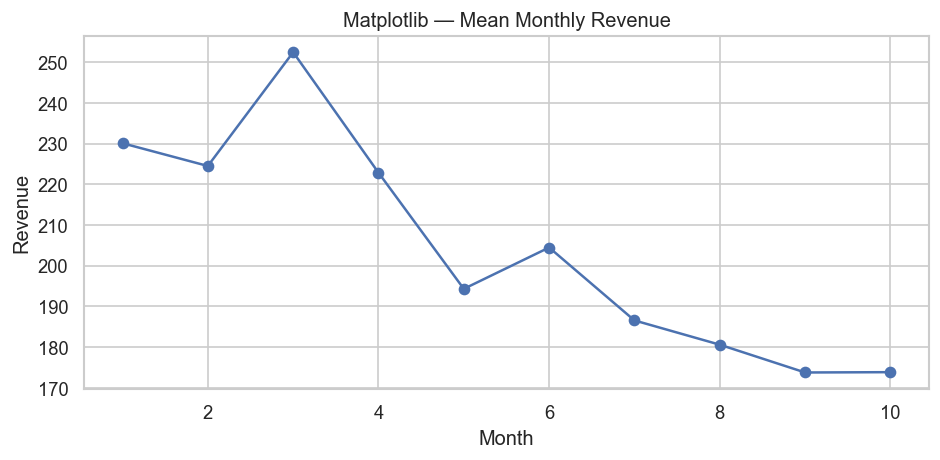

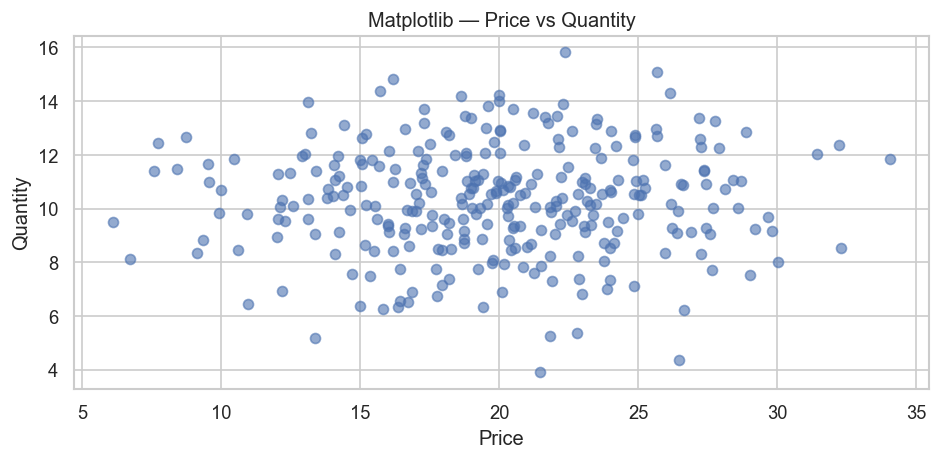

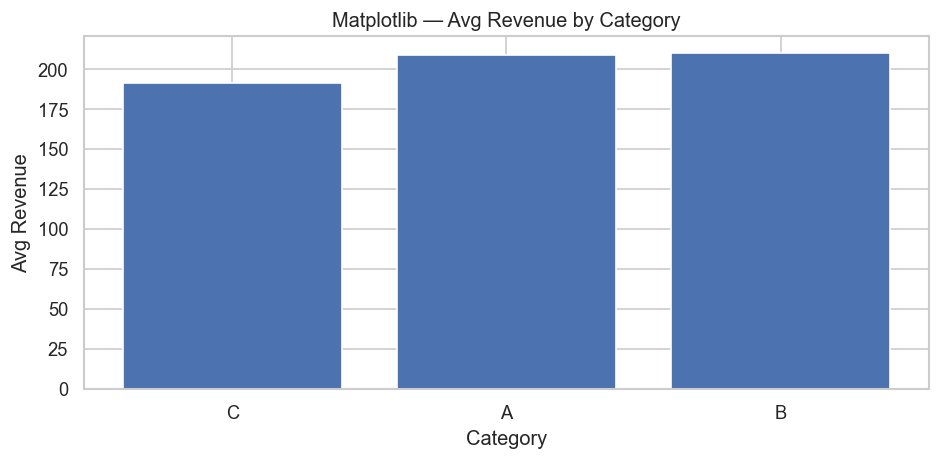

In [3]:
# 4. Matplotlib Basics — Line, Scatter, Bar
trend = df.groupby("month", as_index=False)["revenue"].mean()

# Line: Monthly revenue trend
fig, ax = plt.subplots()
ax.plot(trend["month"], trend["revenue"], marker="o")
ax.set_title("Matplotlib — Mean Monthly Revenue")
ax.set_xlabel("Month"); ax.set_ylabel("Revenue")
ax.grid(True)
plt.tight_layout(); plt.show()

# Scatter: Price vs Quantity
fig, ax = plt.subplots()
ax.scatter(df["price"], df["quantity"], alpha=0.6)
ax.set_title("Matplotlib — Price vs Quantity")
ax.set_xlabel("Price"); ax.set_ylabel("Quantity")
ax.grid(True)
plt.tight_layout(); plt.show()

# Bar: Category-wise average revenue
cat_rev = df.groupby("category", as_index=False)["revenue"].mean().sort_values("revenue")
fig, ax = plt.subplots()
ax.bar(cat_rev["category"], cat_rev["revenue"])
ax.set_title("Matplotlib — Avg Revenue by Category")
ax.set_xlabel("Category"); ax.set_ylabel("Avg Revenue")
plt.tight_layout(); plt.show()


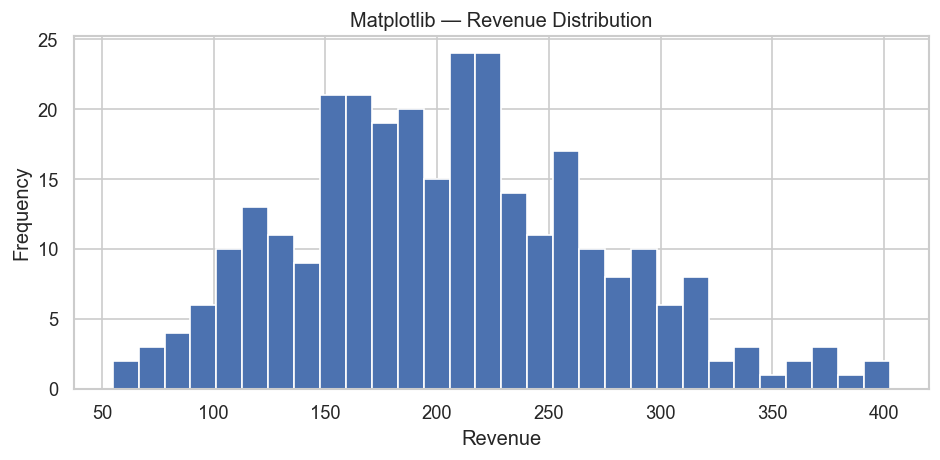

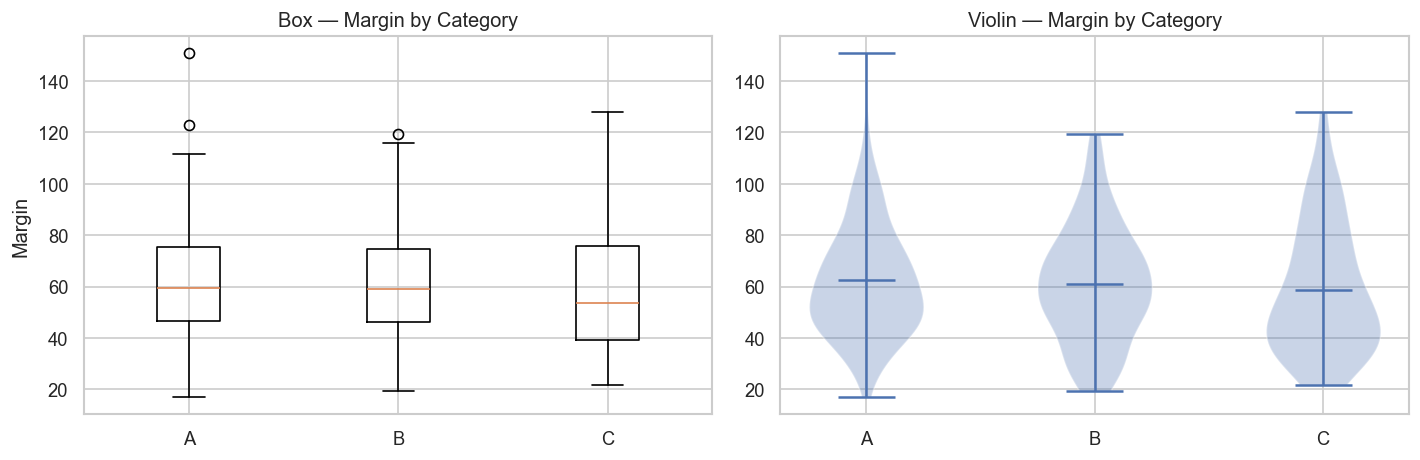

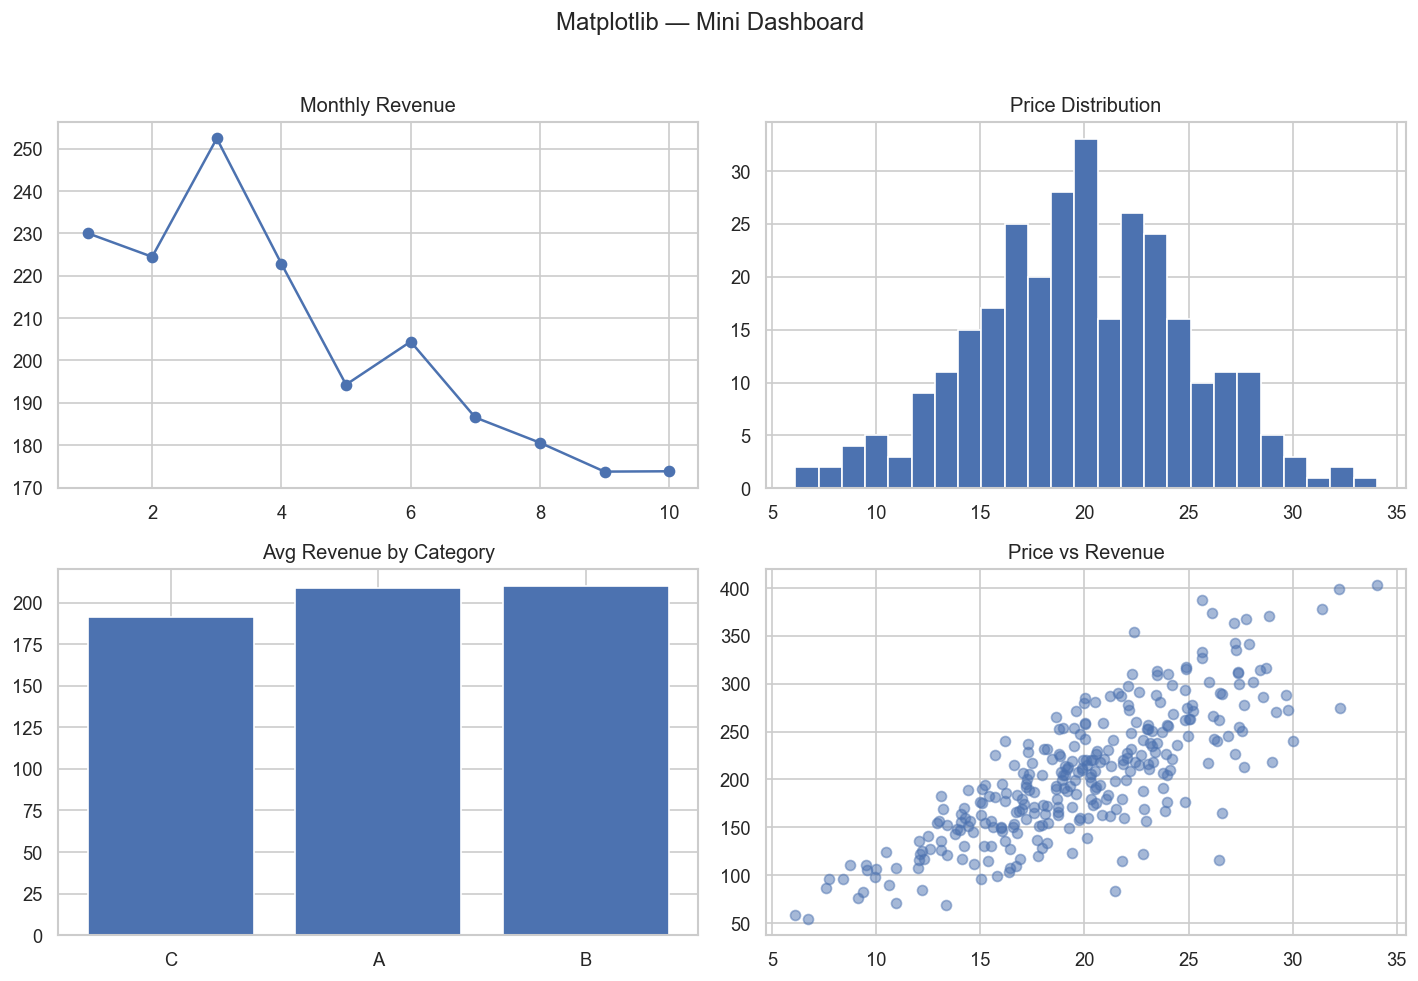

In [4]:
# 5. Matplotlib — Histograms, Box/Violin, Subplots & Save
# Histogram: Revenue distribution
fig, ax = plt.subplots()
ax.hist(df["revenue"], bins=30)
ax.set_title("Matplotlib — Revenue Distribution")
ax.set_xlabel("Revenue"); ax.set_ylabel("Frequency")
plt.tight_layout(); plt.show()

# Box/Violin: Margin by Category
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].boxplot([df[df.category==c]["margin"] for c in ["A","B","C"]], labels=["A","B","C"])
axs[0].set_title("Box — Margin by Category"); axs[0].set_ylabel("Margin")
axs[1].violinplot([df[df.category==c]["margin"] for c in ["A","B","C"]], showmeans=True)
axs[1].set_title("Violin — Margin by Category"); axs[1].set_xticks([1,2,3]); axs[1].set_xticklabels(["A","B","C"])
plt.tight_layout(); plt.show()

# Subplots mini-dashboard
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0,0].plot(trend["month"], trend["revenue"], marker="o"); axs[0,0].set_title("Monthly Revenue")
axs[0,1].hist(df["price"], bins=25); axs[0,1].set_title("Price Distribution")
axs[1,0].bar(cat_rev["category"], cat_rev["revenue"]); axs[1,0].set_title("Avg Revenue by Category")
axs[1,1].scatter(df["price"], df["revenue"], alpha=0.5); axs[1,1].set_title("Price vs Revenue")
fig.suptitle("Matplotlib — Mini Dashboard", y=1.02)
plt.tight_layout(); plt.show()

# # SAVE EXAMPLE
# fig.savefig("day8_mpl_dashboard.png", bbox_inches="tight", dpi=150)


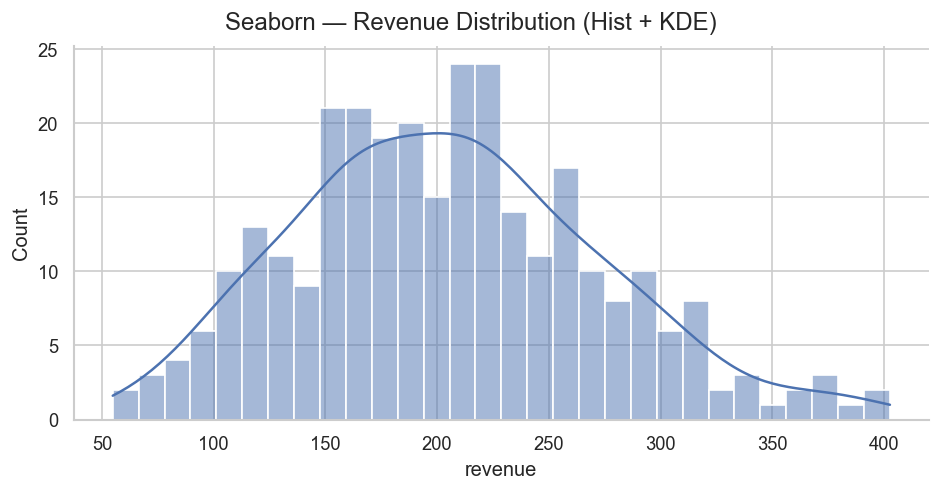

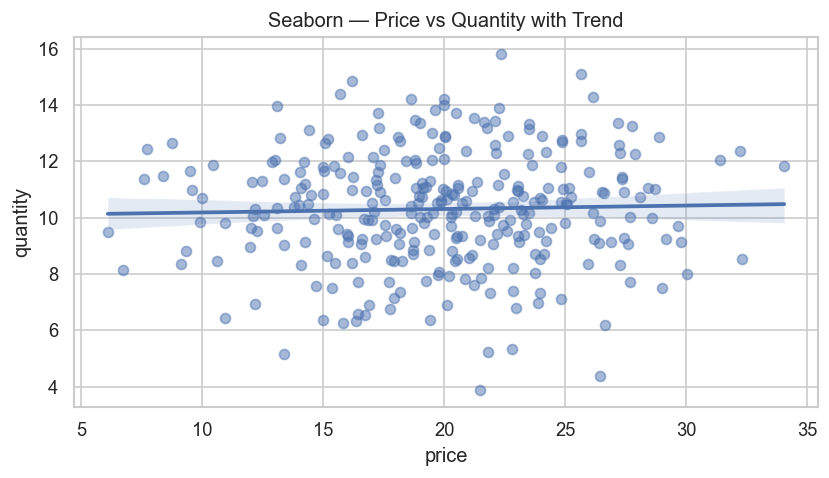

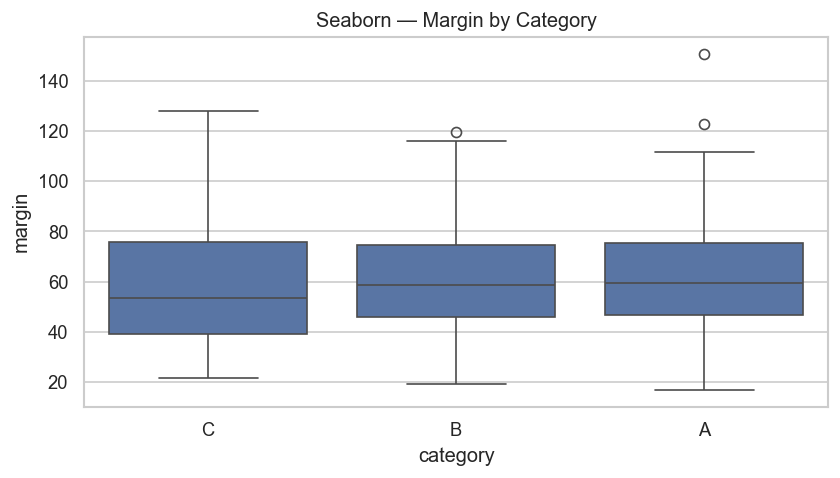

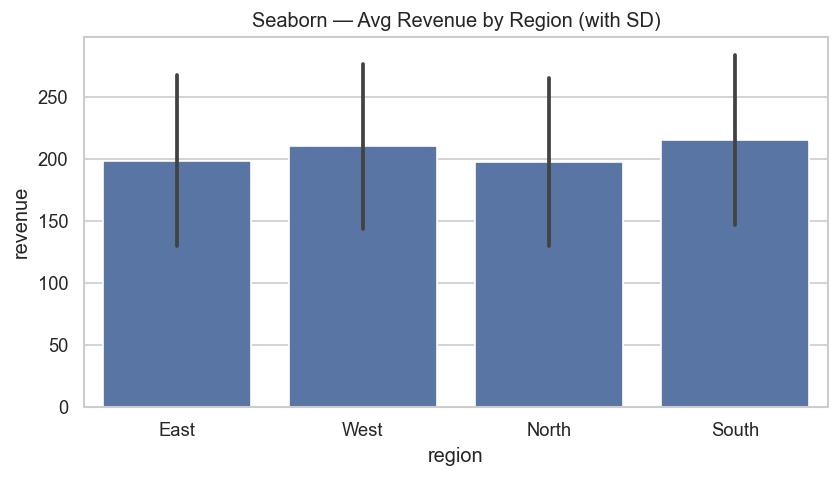

In [5]:
# 🔎 6. Seaborn — Distributions, Relationships, Categorical
sns.displot(df, x="revenue", bins=30, kde=True, height=4, aspect=2)
plt.suptitle("Seaborn — Revenue Distribution (Hist + KDE)", y=1.02)
plt.show()

plt.figure(figsize=(8,4))
sns.regplot(data=df, x="price", y="quantity", scatter_kws={"alpha":0.5})
plt.title("Seaborn — Price vs Quantity with Trend")
plt.show()

plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="category", y="margin")
plt.title("Seaborn — Margin by Category")
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(data=df, x="region", y="revenue", estimator=np.mean, errorbar="sd")
plt.title("Seaborn — Avg Revenue by Region (with SD)")
plt.show()


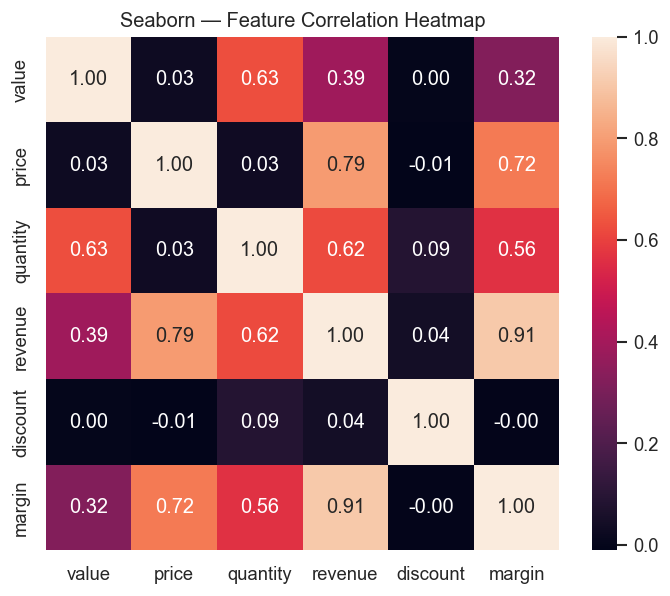

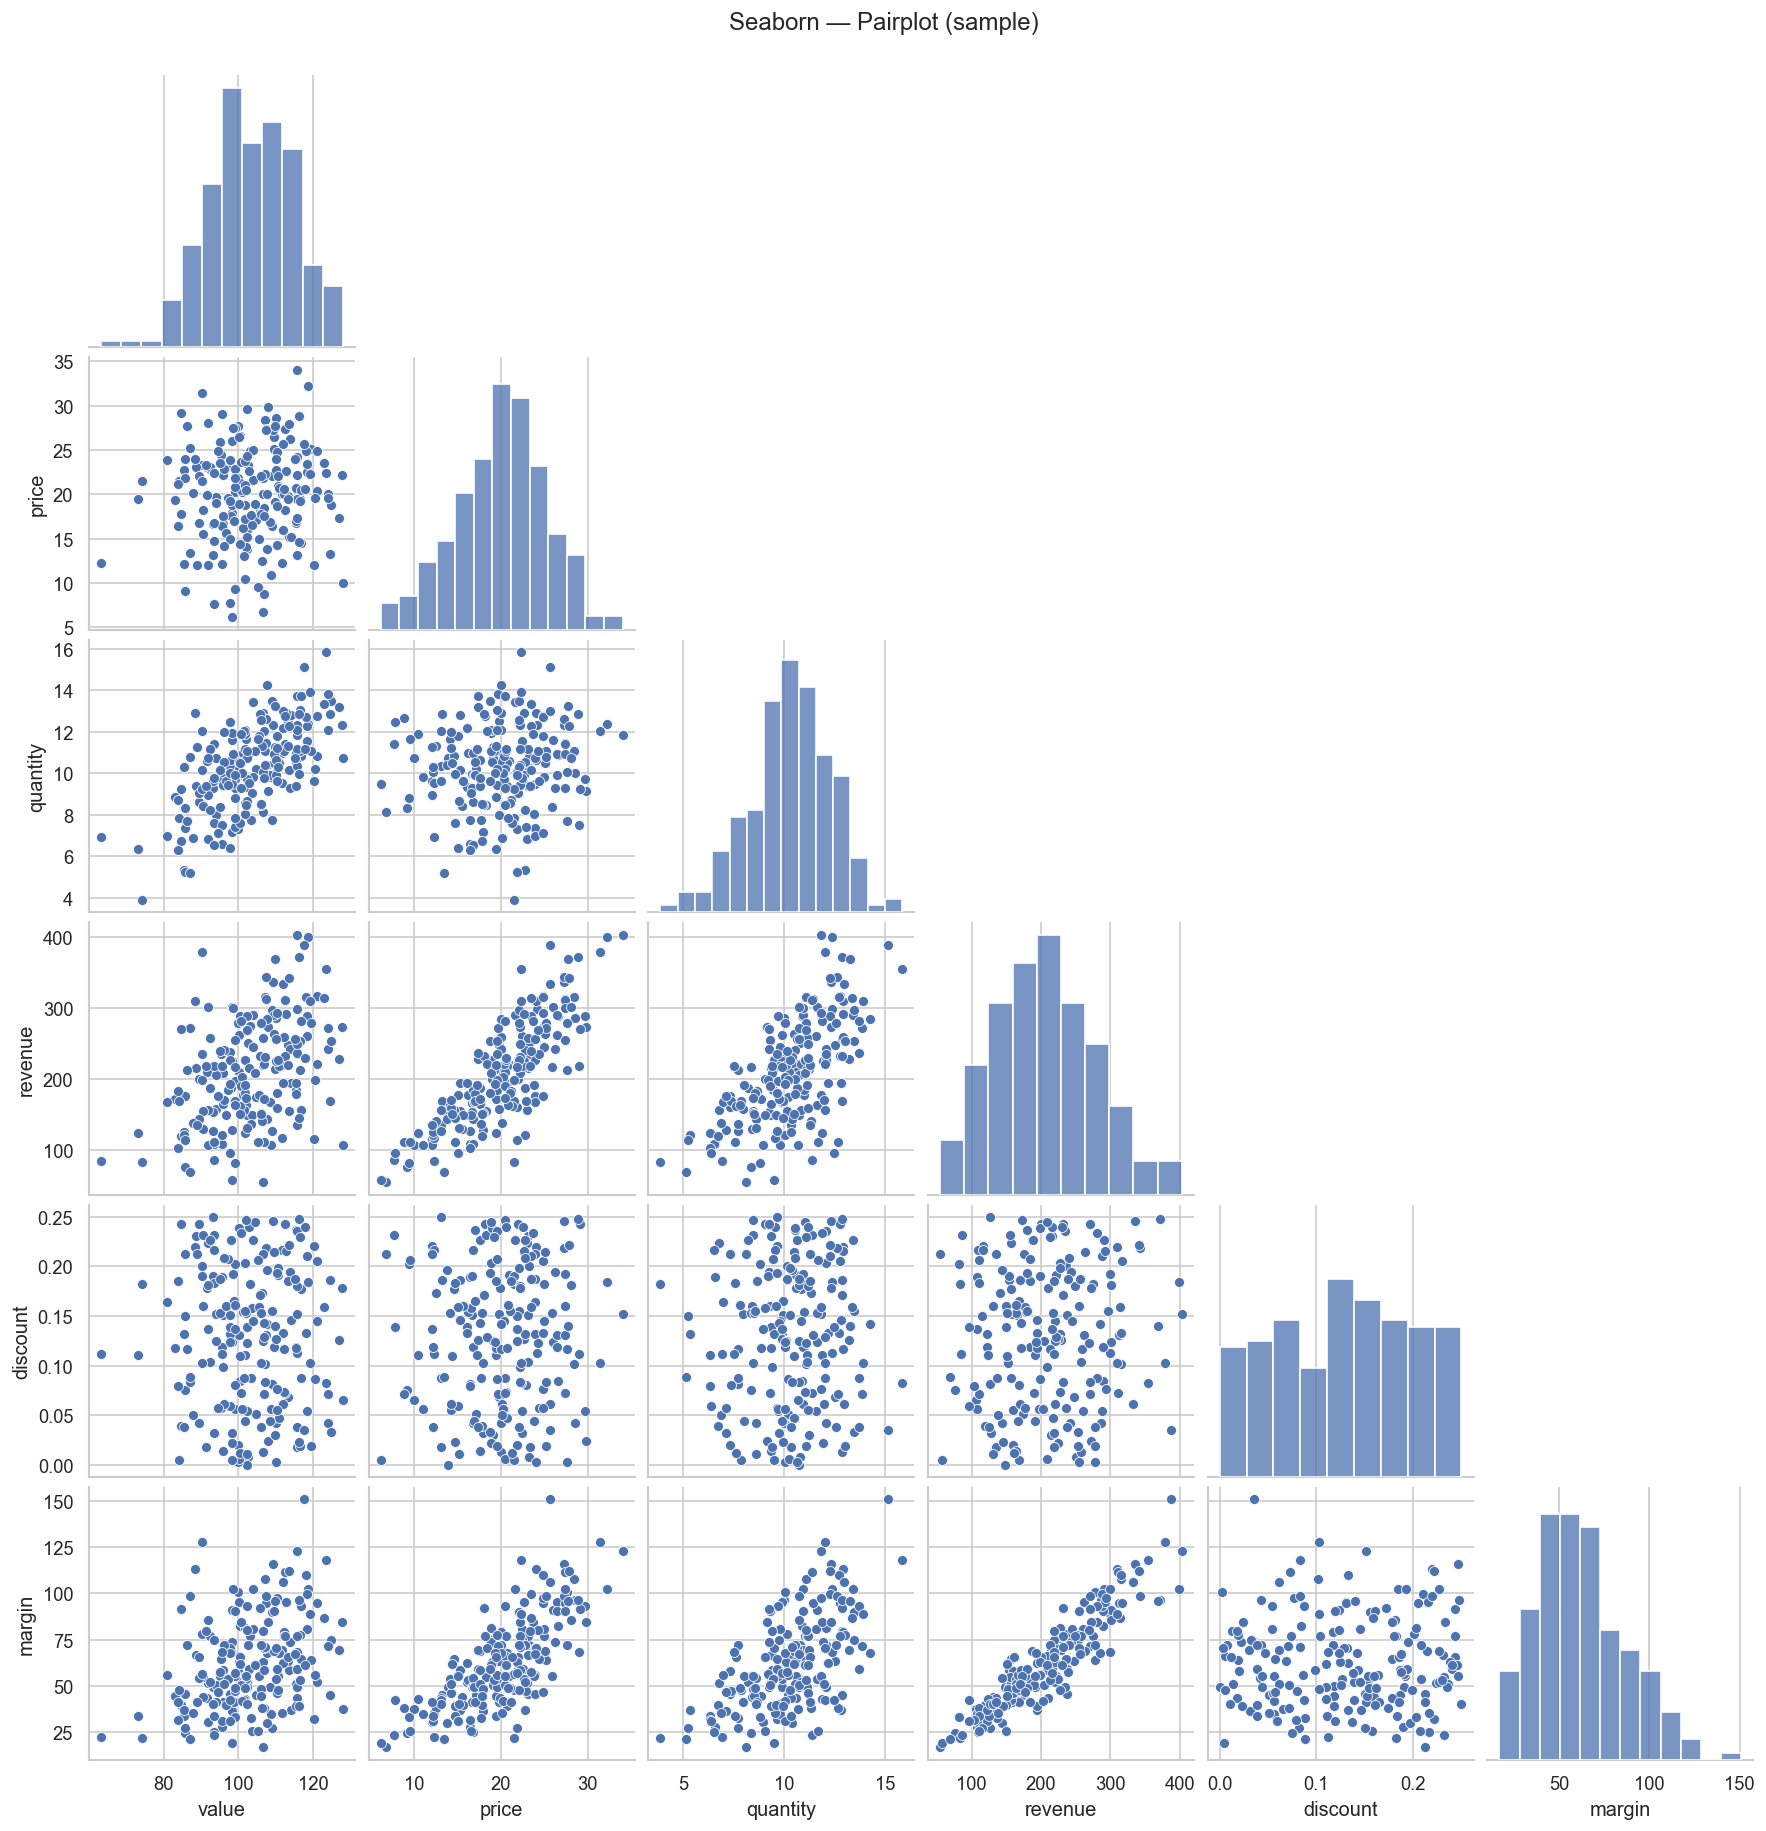

In [6]:
# 7. Seaborn — Heatmap (Correlation) & Pairplot
num_cols = ["value", "price", "quantity", "revenue", "discount", "margin"]
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Seaborn — Feature Correlation Heatmap")
plt.tight_layout(); plt.show()

sample = df.sample(200, random_state=42)
sns.pairplot(sample[num_cols], corner=True, diag_kind="hist")
plt.suptitle("Seaborn — Pairplot (sample)", y=1.02)
plt.show()


In [7]:
# 8. Plotly — Interactive Line, Scatter, Bars
fig = px.line(trend, x="month", y="revenue", title="Plotly — Mean Monthly Revenue", markers=True)
fig.update_layout(xaxis_title="Month", yaxis_title="Revenue")
fig.show()

fig = px.scatter(
    df, x="price", y="revenue", color="category",
    hover_data=["region", "quantity", "discount"],
    title="Plotly — Price vs Revenue by Category"
)
fig.show()

fig = px.bar(cat_rev, x="category", y="revenue", title="Plotly — Avg Revenue by Category")
fig.show()


In [8]:
# 9. Plotly — Facets, Heatmap, and Simple Animation
facet = df.groupby(["region","category"], as_index=False)["revenue"].mean()
fig = px.bar(facet, x="category", y="revenue", facet_col="region", title="Plotly — Avg Revenue by Category Across Regions")
fig.show()

fig = px.imshow(corr, text_auto=True, aspect="auto", title="Plotly — Correlation Heatmap")
fig.show()

monthly = df.groupby(["month","category"], as_index=False)["revenue"].mean()
fig = px.line(
    monthly, x="month", y="revenue", color="category",
    title="Plotly — Monthly Revenue by Category (Animated)",
    animation_frame="month", range_y=[monthly["revenue"].min()*0.9, monthly["revenue"].max()*1.1]
)
fig.show()


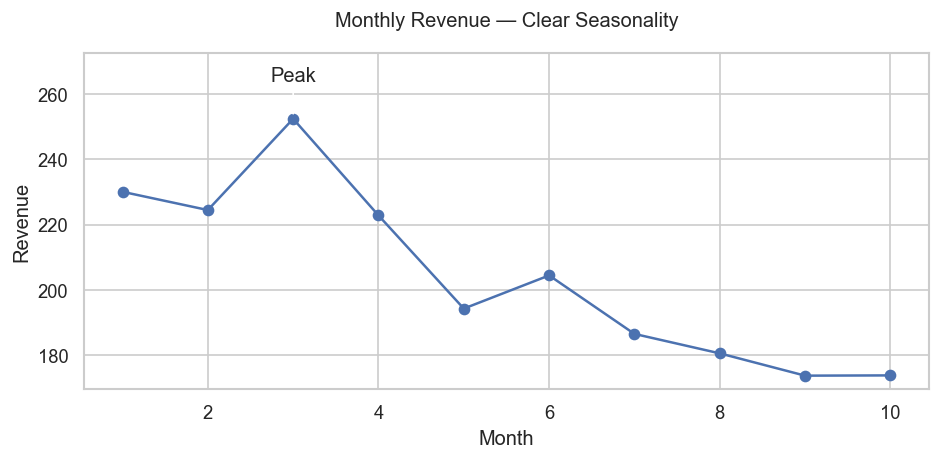

In [9]:
# 10. Storytelling: Titles, Subtitles, Captions, Annotations
# Identify peak point
max_idx = trend["revenue"].idxmax()
x0 = trend.loc[max_idx, "month"]
y0 = trend.loc[max_idx, "revenue"]

fig, ax = plt.subplots(figsize=(8, 4))

# Line plot
ax.plot(trend["month"], trend["revenue"], marker="o")

# Add headroom so annotations don't hit the title
ax.set_ylim(top=y0 * 1.08)

# Titles & labels
ax.set_title("Monthly Revenue — Clear Seasonality", pad=16)
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")

# Annotation with pixel-based offset (robust)
ax.annotate(
    "Peak",
    xy=(x0, y0),
    xycoords="data",
    xytext=(0, 20),                
    textcoords="offset points",
    ha="center",
    va="bottom",
    arrowprops=dict(arrowstyle="->", lw=1)
)

ax.grid(True)
plt.tight_layout()
plt.show()

summary = (
    "Notes: Revenue shows seasonal lift. Category A tends to outperform; "
    "consider targeted promos for B/C in low months."
)
fig = px.line(trend, x="month", y="revenue", markers=True, title="Monthly Revenue — Annotated")
fig.update_layout(
    annotations=[
        dict(
            x=trend["month"].iloc[max_idx], y=trend["revenue"].iloc[max_idx],
            xref="x", yref="y", text="Peak here", showarrow=True, arrowhead=3
        ),
        dict(x=0.5, y=-0.25, xref="paper", yref="paper", text=summary, showarrow=False)
    ]
)
fig.show()


## 11. Same Insight, Different Strengths
- **Matplotlib** gave full control and export-ready static images.
- **Seaborn** gave quick, statistically meaningful insights with minimal code.
- **Plotly** turned the same story into an interactive, stakeholder-friendly demo.
In real projects, you’ll often use **all three**.

## 12. Production Tips
- Set global styles once (fonts, DPI, color) for consistency.
- Use pure functions to create charts (easy to test/reuse).
- Always label axes, add units, and meaningful titles.
- Add captions/notes with assumptions, filters, time windows.
- Save figures with `bbox_inches="tight"` and a naming convention.
- For dashboards, keep interaction purposeful (hover info, filters).

## 13. Exercises
1) **EDA**: Plot distributions of `price`, `quantity`, `revenue` (all 3 libs).
2) **Comparison**: Compare `margin` by `category` (box or violin + bar).
3) **Relationship**: Scatter `price` vs `revenue`, color by `region`, add trend (Seaborn), then interactive (Plotly).
4) **Correlation**: Plot heatmap and highlight the strongest positive and negative pairs (write a short note).
5) **Story**: Create a 2×2 dashboard for stakeholders with:
   - Monthly revenue trend
   - Category revenue bar
   - Margin distribution
   - Price vs revenue scatter
   Add a title + 2 bullet insights as a caption.

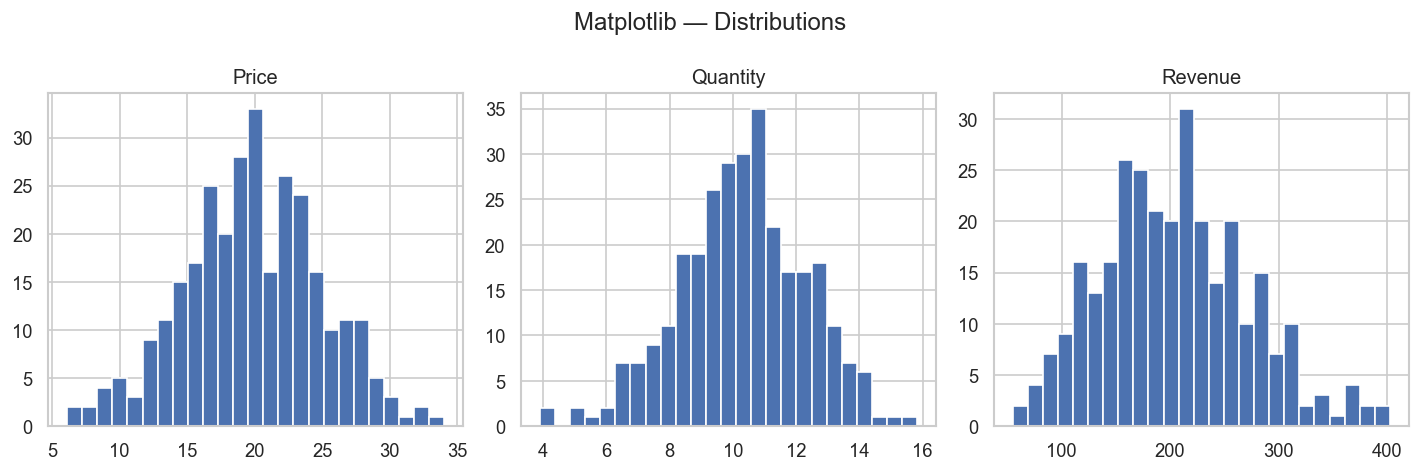

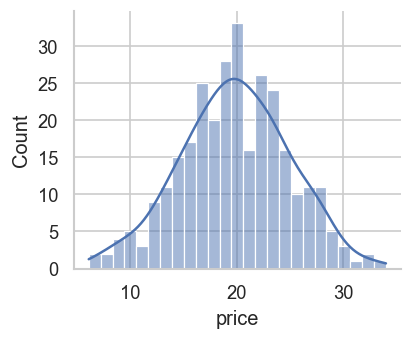

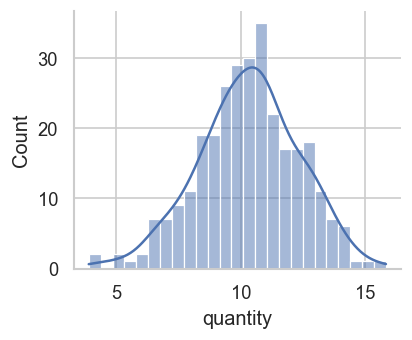

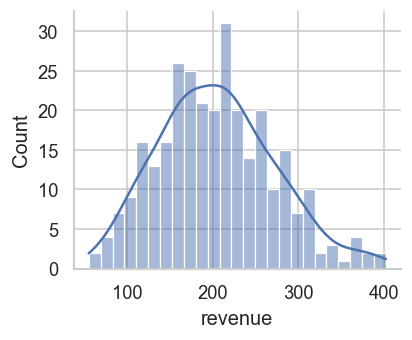

In [10]:
# 14. Exercise Solutions — Distributions
fig, axs = plt.subplots(1,3, figsize=(12,4))
axs[0].hist(df["price"], bins=25); axs[0].set_title("Price")
axs[1].hist(df["quantity"], bins=25); axs[1].set_title("Quantity")
axs[2].hist(df["revenue"], bins=25); axs[2].set_title("Revenue")
fig.suptitle("Matplotlib — Distributions")
plt.tight_layout(); plt.show()

sns.displot(df, x="price", bins=25, kde=True, height=3, aspect=1.2)
sns.displot(df, x="quantity", bins=25, kde=True, height=3, aspect=1.2)
sns.displot(df, x="revenue", bins=25, kde=True, height=3, aspect=1.2)
plt.show()

for col in ["price","quantity","revenue"]:
    fig = px.histogram(df, x=col, nbins=25, title=f"Plotly — {col.capitalize()} Distribution")
    fig.show()


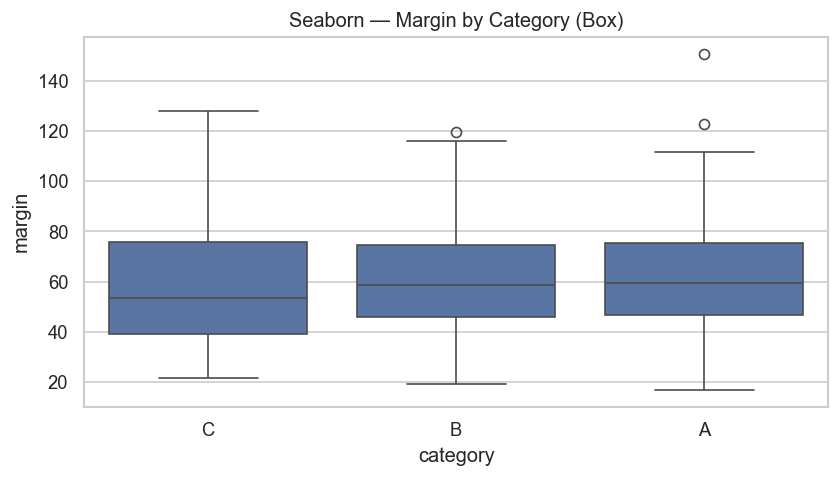

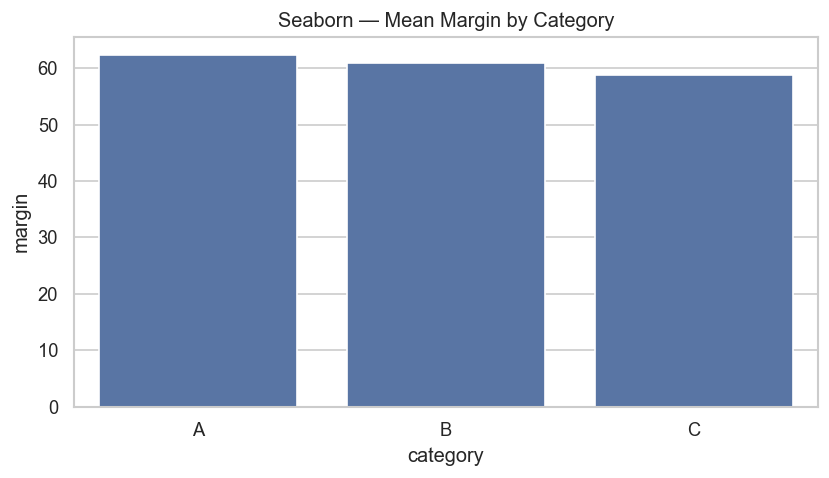

In [11]:
# 14. Exercise Solutions — Margin by category
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="category", y="margin")
plt.title("Seaborn — Margin by Category (Box)")
plt.show()

cat_margin = df.groupby("category", as_index=False)["margin"].mean()
plt.figure(figsize=(8,4))
sns.barplot(data=cat_margin, x="category", y="margin", errorbar="sd")
plt.title("Seaborn — Mean Margin by Category")
plt.show()

fig = px.box(df, x="category", y="margin", title="Plotly — Margin by Category")
fig.show()


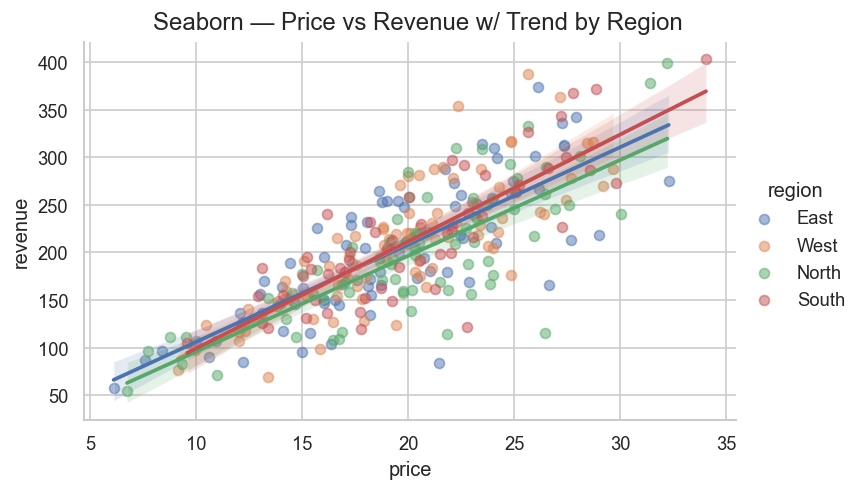

In [12]:
# 14. Exercise Solutions — Relationship: price vs revenue
import seaborn as sns
sns.lmplot(data=df, x="price", y="revenue", hue="region", height=4, aspect=1.6, scatter_kws={"alpha":0.5})
plt.suptitle("Seaborn — Price vs Revenue w/ Trend by Region", y=1.02)
plt.show()

fig = px.scatter(
    df, x="price", y="revenue", color="region",
    hover_data=["category","quantity","discount"],
    title="Plotly — Price vs Revenue by Region"
)
fig.show()


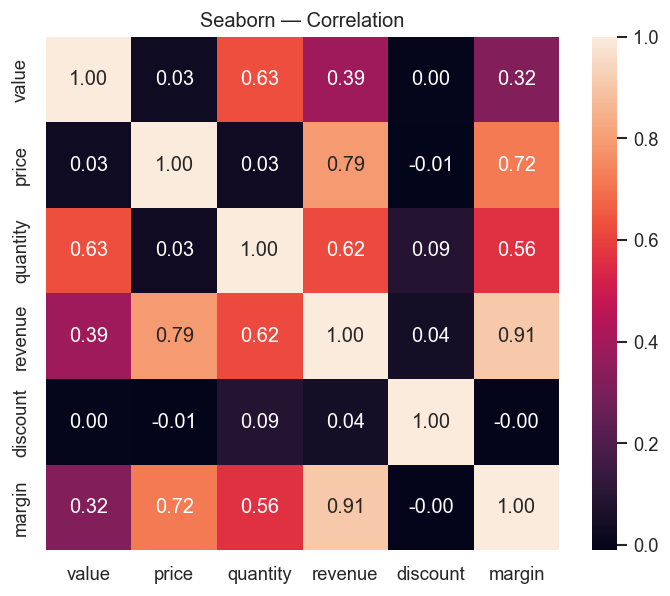

Strongest positive correlation: (('revenue', 'margin'), 0.9078555482247588)
Strongest negative correlation: (('price', 'discount'), -0.010463672304051288)


In [13]:
# 14. Exercise Solutions — Correlation heatmap + strongest pairs
num_cols = ["value","price","quantity","revenue","discount","margin"]
corr = df[num_cols].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, fmt=".2f", square=True)
plt.title("Seaborn — Correlation")
plt.tight_layout(); plt.show()

corr_unstacked = corr.where(~np.eye(corr.shape[0], dtype=bool)).unstack().dropna()
strong_pos = corr_unstacked.idxmax(), corr_unstacked.max()
strong_neg = corr_unstacked.idxmin(), corr_unstacked.min()
print("Strongest positive correlation:", strong_pos)
print("Strongest negative correlation:", strong_neg)


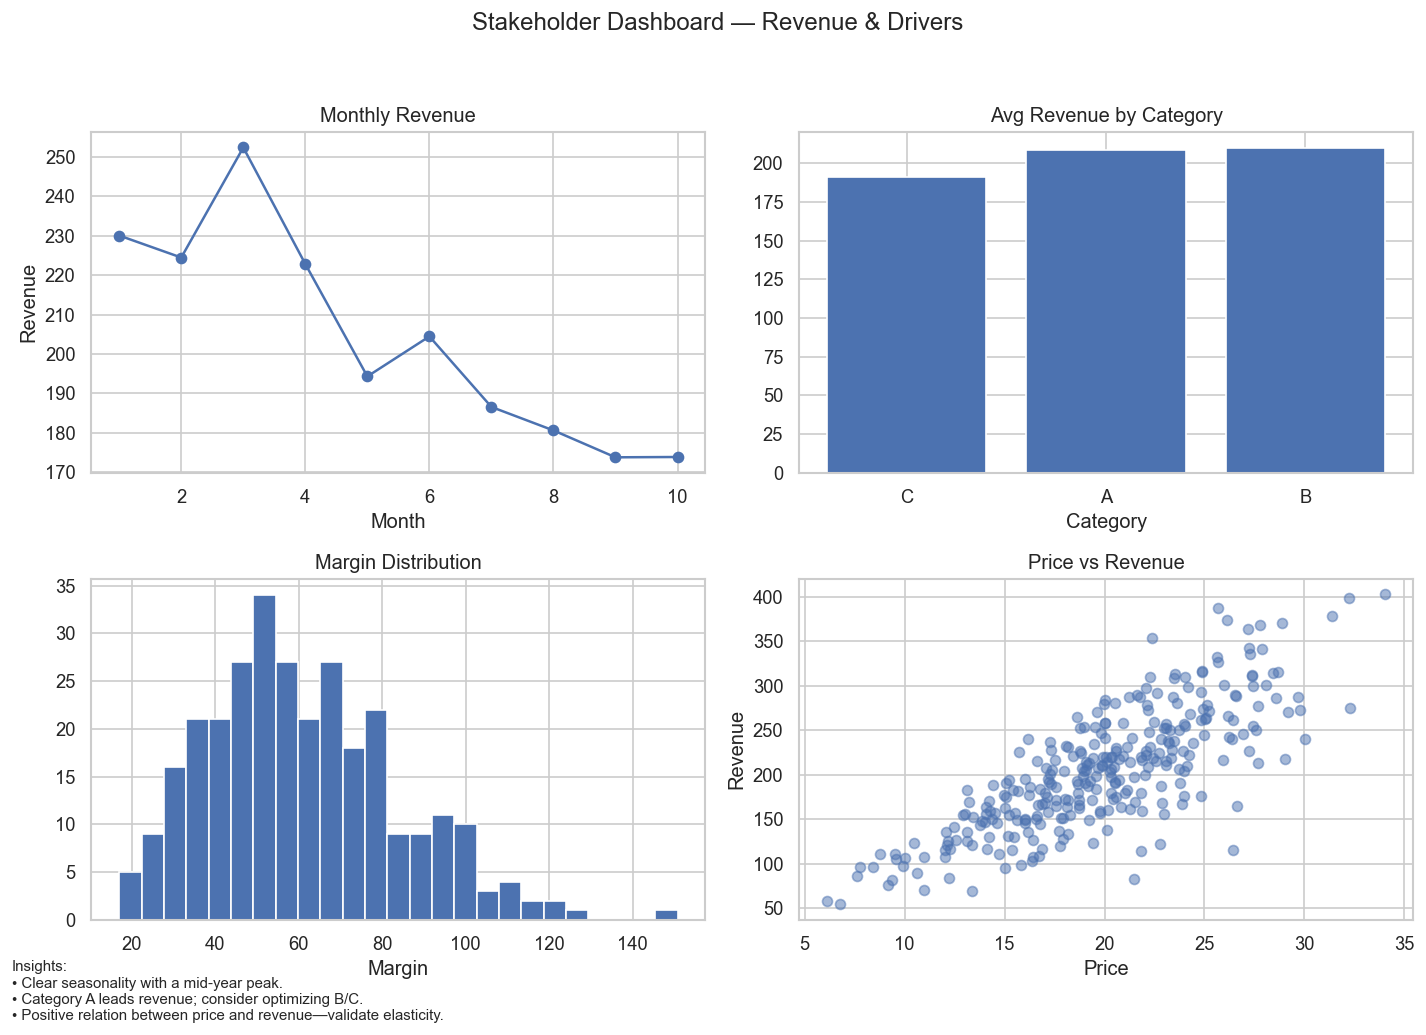

In [14]:
# 14. Exercise Solutions — Stakeholder mini-dashboard (Matplotlib)
fig, axs = plt.subplots(2,2, figsize=(12,8))
axs[0,0].plot(trend["month"], trend["revenue"], marker="o"); axs[0,0].set_title("Monthly Revenue"); axs[0,0].set_xlabel("Month"); axs[0,0].set_ylabel("Revenue")
axs[0,1].bar(cat_rev["category"], cat_rev["revenue"]); axs[0,1].set_title("Avg Revenue by Category"); axs[0,1].set_xlabel("Category")
axs[1,0].hist(df["margin"], bins=25); axs[1,0].set_title("Margin Distribution"); axs[1,0].set_xlabel("Margin")
axs[1,1].scatter(df["price"], df["revenue"], alpha=0.5); axs[1,1].set_title("Price vs Revenue"); axs[1,1].set_xlabel("Price"); axs[1,1].set_ylabel("Revenue")
fig.suptitle("Stakeholder Dashboard — Revenue & Drivers", y=1.03)
caption = (
    "Insights:\n"
    "• Clear seasonality with a mid-year peak.\n"
    "• Category A leads revenue; consider optimizing B/C.\n"
    "• Positive relation between price and revenue—validate elasticity."
)
fig.text(0.01, -0.02, caption, fontsize=9)
plt.tight_layout(); plt.show()


## 15. Interview Nuggets
- **Why not just one library?** Each optimizes for a different goal: control vs. insights vs. storytelling.
- **Production habits**: consistent style, labeling, captions, reproducible saving, functions for repeatable visuals.
- **Stakeholder focus**: interactivity helps exploration; static figures help formal decision-making.

## 16. Wrap-Up
**Matplotlib** for full control & static exports, **Seaborn** for fast, statistically meaningful EDA, **Plotly** for interactive storytelling and dashboards. In practice, you’ll often combine them.
